# Rozpoznawanie obrazu
Ostatnia aktualizacja: 2021.04.07

Zanim zaczniemy: Runtime / Change runtime type / włączamy GPU

## MNIST
Zaczniemy od zbioru MNIST (Modified National Institute of Standards and Technology), zawierającego 70 000 pisanych ręcznie cyfr (o wymiarach 28x28 pixeli w skali szarości o wartościach 0-255, czyli 1 bajt na pixel).
Zbiór jest już podzielony na dane treningowe i testowe, jest bardzo popularny, więc łatwo jest porównać nasze wyniki z publikownaymi w internecie.  
Do sieci neuronowych będziemy używać Keras, który jest nakładką na Tensorflow / Theano / CNTK.  
Obecnie najczęściej do przetwarzania obrazu używa się Tensorflow, Keras, PyTorch i Caffe. Ten ostatni moim zdaniem jest najmniej przyjazny i traci na popularności, ale kiedyś był często używany do obrazu, więc ma spore 'model zoo'.  
Na początek zaimportujmy nasz zbiór z keras.datasets i numpy.  
Zbiory dostępne w Keras:  
https://keras.io/datasets/


## Instructions
Powtórz eksperyment z pierwszego notatnika (w którym klasyfikowaliśmy MNIST używając SVM i CNN) na zbiorze danych CIFAR-10: https://keras.io/datasets/

Najpierw przeprowadź klasyfikację za pomocą sieci, które stworzyliśmy na zajęciach - trzeba je dostosować, bo zdjęcia w CIFAR są w RGB, czyli mają 3 kanały.

Następnie wydziel zbiór walidacyjny i dodaj early stopping (https://keras.io/api/callbacks/early_stopping/)

Kolejnym krokiem jest próba poprawienia wyniku. Spróbuj wprowadzić modyfikacje (np. dodawanie, usuwanie lub modyfikacja warstw Conv2D, Dense, Pooling, dodanie Dropoutu, modyfikacja hiperparametrów, itd.) do sieci, które mogłyby poprawić jej skuteczność. Stwórz co najmniej 3 takie sieci i opisz wprowadzone w nich zmiany.

Dla chętnych: jakby ktoś chciałby się bardziej pobawić sieciami, można spróbować dodać jeszcze data augmentation i zrobić porównanie treningu z augmentation i bez.

Wrzuć plik .ipynb ze swoimi eksperymentami i opisami stworzonych sieci.

W razie pytań lub wąpliwości, proszę pisać: lukasz.wilczynski@pjwstk.edu.pl
My work

In [1]:
from keras.datasets import cifar100 as dataset
import numpy as np

Wczytajmy dane mnist do zmiennych X_train, y_train, X_test, y_test, używając metody load_data. 
X jest dużą literą bo to macierz, y małą bo wektor.

In [2]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

### Wizualizacja danych
Zanim zaczniemy cokowliek robić z naszymi danymi, warto zobaczyć, jak wyglądają. Na dobry początek wypiszmy sobie kształty naszych zbiorów danych oraz  wydrukujmy pierwszy element zbioru treningowego (funkcja print) i jego etykietę. 

In [3]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

X_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)


Ponieważ nasze dane to tak naprawdę pixele w skali szarości, możemy je sobie wyświetlić jako obrazki. pyplot ma funkcję imshow, użyjmy jej do wyświetlenia pierwszego elementu zbioru treningowego. Ponieważ skala szarości, podajmy wartość argumentu cmap 'gray' lub 'Greys'. [Tutaj są różne color mapy.](   
https://matplotlib.org/examples/color/colormaps_reference.html)

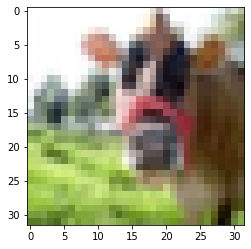

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='bone')

Kiedy drukujemy nasz element funkcją print, nie jest to do końca czytelne, ponieważ rzędy nie mieszczą się w jednej linijce. Wydrukujmy sobie lewy górny róg pierwszego obrazka, np kwadrad 16x16 pixeli (jeśli 16 się nie zmieści, to trochę mniej). Ten sam kwadrat wydrukujmy używając imshow. Czy widać, że patrzymy na to samo? 
Podsumowując, musimy dostać się do pierwszego elementu zbioru treningowego, i przekazać jego kawałek (slice) funkcjom print i imshow. Jeśli ktoś nie wie jak, zamiast przekopywać dokumentację [możemy zerknąć na SO](https://stackoverflow.com/questions/509211/understanding-slice-notation_)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [254 255 255]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [253 255 255]
  [252 253 248]
  [248 236 228]
  [239 221 216]
  [238 227 227]
  [252 254 253]
  [252 255 255]
  

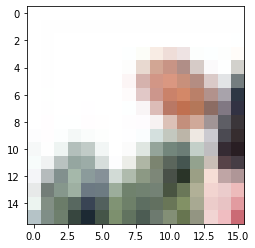

In [5]:
image_slice = X_train[0][0:16, 0:16]
print(image_slice)
plt.imshow(image_slice, cmap='gray')

Jeśli widzimy, że obrazek i print pokazują to samo, obejrzyjmy teraz więcej danych.  
Narysujmy sobie pierwsze 9 lub 16 elementów. Przydadzą się funkcje subplot, imshow z pyplot i ewentualnie google. 

c:\Users\kajka\Documents\ProgrammingProjects\PJATK\Sem3\ZUM\Projekty\Obrazy\pyenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


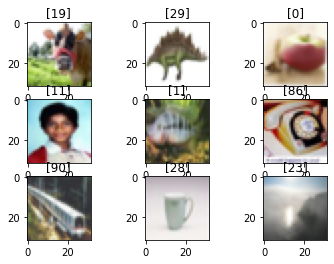

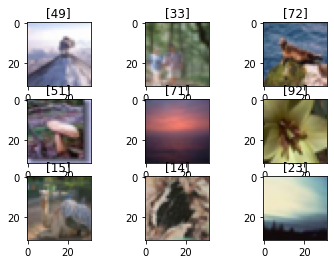

In [6]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
plt.show()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(y_test[i])
  plt.imshow(X_test[i], cmap='gray')
plt.show()

OK, czyli wiemy, jak wyglądają nasze dane. Są to pixele w skali szarości, gdzie 0 to pustka, a 255 to bardzo mocno wciśnięty długopis.  

### Klasyfikacja SVM'em
Ponieważ jest to popularny zbiór danych, możemy sobie podejrzeć, jak różne modele powinny sobie z nim poradzić.  
https://en.wikipedia.org/wiki/MNIST_database  
Z tabelki na tej stronie wynika, że najlepiej radzą sobie CNNy, ale SVM też wypada całkiem nieźle.  
Problem jest taki, że na 60 000 instancji będzie się strasznie długo uczył, więc zrobimy trening na części. Chętni mogą sobie powtórzyć na pełnym zbiorze w domu.  
Zróbmy sobie zmienną train_count i ustawmy jej wartość na 10 000 - na tylu danych będziemy ćwiczyć nasz SVM. Wydrukujmy sobie kształt naszego wycinka pierwszych 10 000 instancji treningowych. 
Zobaczmy też, jak wygląda rozkład klas - czy przypadkiem w pierwszych 10 000 instancji nie będą np. same jedynki i dwójki. Numpy ma przydatną funkcję unique. 

In [7]:
train_count = 10000
X_train = X_train[0:train_count]
y_train = y_train[0:train_count]

np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 92,  99,  92,  95, 108, 110,  69,  99, 124,  98,  95, 114,  94,
         92, 113,  91, 103,  67,  90, 109,  95, 109, 105,  84,  95,  97,
        107,  96, 101,  88, 108,  94,  97, 111,  95, 104,  97,  90, 109,
         86, 110, 112, 104,  91, 107,  89,  91, 100, 102,  98,  93, 107,
         91, 105,  94, 107, 115, 115, 112,  96,  98,  97, 109, 123, 125,
        101, 108, 107, 103,  90, 107, 109, 105, 100,  84,  80, 102, 106,
        115, 103, 105,  90, 102,  95, 102, 115,  90, 108,  87, 106, 109,
         89,  99,  84, 101, 105,  81,  

Użyjmy SVM'a z scikit-learn'a. Deskewing sobie odpuścimy (jak ktoś bardzo chce, proponuję w domu lub na szybko znaleźć gotowy kod), tak jak w linku użyjmy 'poly' kernel, a gamma ustawmy na 0.1.
Czyli chcemy stworzyć obiekt klasyfikatora używając svm.SVC, a następnie wytrenować go na 10000 danych treningowych (metoda fit).  
SVM może przyjąć dane w postaci wektora liczb, więc przyda się metoda reshape, która pozwoli nam przekształcić 2-wymiarowe macierze w wektory.

In [8]:
X_train.shape

(10000, 32, 32, 3)

In [9]:
from sklearn import svm
classifier = svm.SVC(kernel='poly', gamma=0.1)
classifier.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]), y_train)

c:\Users\kajka\Documents\ProgrammingProjects\PJATK\Sem3\ZUM\Projekty\Obrazy\pyenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1, kernel='poly')

Jeśli wszystko się udało, teraz zobaczmy, jak mu pójdzie z danymi testowymi. Użyjmy metody 'predict' naszego wytrenowanego już klasyfikatora i zapiszmy sobie wynik do zmiennej y_pred (dostaniemy wektor 'predykcji').

In [10]:
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))

Teraz porównajmy sobie nasze predykcje z prawidłowymi etykietami. Wypiszmy sobie może pierwsze 10 wyników i 10 etykiet. 

In [11]:
print(y_pred[:20])
print(y_test[:20])

[12  4 15 87 71 43 10  7 23 32 73  5 19 69 35 77 92 86 70 53]
[[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]
 [71]
 [75]
 [81]
 [69]
 [40]
 [43]
 [92]
 [97]
 [70]
 [53]]


Świetnie. sklearn ma sporo funkcji do analizowania wyników predykcji, użyjmy accuracy_score i confusion_matrix (powinny być w skearn.metrics). 

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.156
[[41  3  6 ...  0  3  1]
 [ 1 13  1 ...  3  0  1]
 [ 1  0 16 ...  2  7  3]
 ...
 [ 0  1  3 ...  6  1  2]
 [ 0  1  8 ...  0  5  0]
 [ 0  0  0 ...  1  1  4]]


Patrząc na confusion matrix widzimy, co się najczęściej myli, np 1 i 7, 3 i 5, itp. Jak widzieliśmy, SVM przyjmuje wektor zamiast macierzy, czyli nasze dane przestały być 2D. Nasz obrazek teraz ma 28*28 na 1 pixeli. 

[Tutaj](https://scikit-learn.org/stable/modules/model_persistence.html) jest opisana serializacja wytrenowanych modeli w sklearn, teraz nie mamy takiej potrzeby.

### Mnist fashion i inne
Teraz zmieńmy zbiór danych z mnist na mnist_fashion i zobaczmy jak sobie 
poradzi z ubraniami. Możemy albo skopiować komórki powyżej, albo zmienić tylko import mnist na fashion_mnist w pierwszej początkowej komórce kodu i uruchomić wszystkie pozostałe jeszcze raz na nowym zbiorze danych (są kompatybilne).  

Jak komuś się bardzo spodobało rozpoznawanie cyfr, to jest jeszcze zbiór emnist:  
https://www.nist.gov/node/1298471/emnist-dataset  
https://www.kaggle.com/crawford/emnist  

Przy okazji - na kaggle są bardzo ciekawe zbiory danych: 
https://www.kaggle.com/datasets  

### Klasyfikacja CNN'em
SVM poradził sobie całkiem nieźle, zobaczmy jak poradzi sobie CNN.  
Spróbujmy zrobić i wytrenować niewielką sieć - taką, która wytrenuje się w kilka minut. 

####Przygotowanie danych

Dla porządku wczytajmy jeszcze raz dane, czyli wczytujemy je do X_train, y_train, X_test, y_test używając metody load_data.  

In [143]:

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [144]:
shuffler = np.random.permutation(len(X_train))
X_train = X_train[shuffler]
y_train = y_train[shuffler]
(X_train, X_validation) = np.split(X_train, [int(0.8*len(X_train))])
(y_train, y_validation) = np.split(y_train, [int(0.8*len(y_train))])


Sprawdźmy kształty naszych danych (metoda shape) i sprawdźmy jakiego typu są nasze dane (funkcja type). Sprawdźmy zarówno typ zbioru treningowego jak i pojedynczego pixela. 

In [145]:
print(len(y_train))
print(len(X_train))
print(len(y_validation))
print(len(X_validation))

40000
40000
10000
10000


In [146]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][0][0]))

X_train: {}, y_train: {} (40000, 32, 32, 3) (40000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Sieć szybciej się nauczy na danych o wartościach w zakresie 0-1 niż 0-255, więc musimy je znormalizować. Przeróbmy dane treningowe i testowe tak, żeby miały wartości w zakresie 0-1 zamiast 0-255. Następnie sprawdźmy typ pojedynczego pixela. 


In [147]:
X_train = X_train / 255 # przechodzimy z przedziału 0-255 na 0-1
X_test = X_test / 255

Domyślna konfiguracja Keras korzysta z 32-bitowych float'ów. Jak w trakcie treningu będziemy podawać sieci 64-bitowe tablice, będzie dużo niepotrzebnego kopiowania, alokowania pamięci, itp. Dlatego przed treningiem zadbajmy o to, żeby nasze dane treningowe i testowe były w formacie 32-bitowym (numpy, metoda astype). 


In [148]:
print(type(X_train[0][0][0]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(type(X_train[0][0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (score dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot zamiast tego będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

w keras.utils.np_utils mamy funcję to_categorical, która nam zrobi konwersję. Wyniki wpiszmy do zmiennych Y_train i Y_test (duże litery bo macierze). 

In [149]:
# [1000000000] -> score dla cyfry 0
# [0.1 0.2 0.4 ... 0.7 0.1] max 0.7; zwyciezca - cyfra 8


In [150]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)
Y_test = np_utils.to_categorical(y_test)

Ostatnia sprawa. Conv2D przyjmuje obrazki w postaci tablicy wielowymiarowej - nie spłaszczamy danych do postaci wektora tak jak w przypadku SVM'a, bo nasz filtr / kernel działa na danych 'przestrzennych' - szerokość x wysokość x liczba kanałów.  
W przypadku zdjęć 200 x 200 pixeli w RGB, każdy obrazek byłby tablicą o wymiarach 200 x 200 x 3 (lub 3 x 200 x 200 zależnie od tego jak przechowujemy dane).  
Tutaj mamy 1 bajt na pixel i obrazek o wymiarach przestrzennych 28 x 28. Zatem nasze dane powinny mieć wymiary 28 x 28 x 1 (czyli ostatnia wartość nie może być liczbą, tylko tablicą przechowującą liczbę).

Czyli musimy wcisnąć 1 wymiar. Gdzie go wciskamy, zależy od konfiguracji. 

```python
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], 1, X_train.shape[1], X_train.shape[2])
    input_shape = (1, X_train.shape[1], X_train.shape[2])
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
 ```
 

In [151]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, *X_train.shape[1], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], 1, X_train.shape[1], X_train.shape[2])
    input_shape = (1, X_train.shape[1], X_train.shape[2])
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
    X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 3)
    input_shape = (X_train.shape[1], X_train.shape[2], 3)

#### Przygotowanie sieci

We wszystkich Conv2D zrobimy kernel 3x3 i aktywację 'relu'.
We wszystkich MaxPooling2D robimy pool_size 2x2

Zróbmy sobie taki model (może być Sequential): 
- Na wejściu Conv2D (musimy podać input_shape - mamy go w zmiennej input_shape)
- MaxPooling2D
- Conv2D, 32 filtry
- MaxPooling2D
- Flatten (spłaszczamy dane do 1-wymiarowego wektora)
- [Dense (czyli tzw. fully connected)](https://keras.io/layers/core/), 128 units, activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
- Na wyjściu Dense, units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Na pewno przydadzą się te importy: 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [152]:
Y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [153]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model_basic = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(100, activation='softmax')
])

Mamy obiekt 'model', teraz musimy uruchomić metodę 'compile', która przygotuje nas do treningu. Spróbujmy loss 'categorical_crossentropy', optimizer 'adam'. Argument metric przyjmuje tablicę stringów, będziemy chcieli 'accuracy'. 

In [154]:
model_basic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Trening
Podobnie jak w scikit-learn uruchamiamy metodę fit, podając jej nasze dane treningowe i etykiety w postaci one-hot.  

20 epok, batch_size np. 128 lub 256  

In [155]:
y_validation.shape

(10000, 100)

In [156]:
Y_train.shape

(40000, 100)

In [157]:
X_train.shape


(40000, 32, 32, 3)

In [158]:
X_validation.shape


(10000, 32, 32, 3)

In [159]:
model_basic.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_validation,y_validation))

Epoch 1/40
157/157 [==============================] - 12s 72ms/step - loss: 4.1794 - accuracy: 0.0717 - val_loss: 382.9813 - val_accuracy: 0.1212
Epoch 2/40
157/157 [==============================] - 11s 73ms/step - loss: 3.5637 - accuracy: 0.1702 - val_loss: 562.5929 - val_accuracy: 0.1115
Epoch 3/40
157/157 [==============================] - 11s 72ms/step - loss: 3.3028 - accuracy: 0.2160 - val_loss: 540.7767 - val_accuracy: 0.1415
Epoch 4/40
157/157 [==============================] - 11s 73ms/step - loss: 3.1249 - accuracy: 0.2488 - val_loss: 638.0408 - val_accuracy: 0.1356
Epoch 5/40
157/157 [==============================] - 11s 72ms/step - loss: 2.9916 - accuracy: 0.2752 - val_loss: 627.7822 - val_accuracy: 0.1422
Epoch 6/40
157/157 [==============================] - 11s 73ms/step - loss: 2.8599 - accuracy: 0.2989 - val_loss: 685.3001 - val_accuracy: 0.1359
Epoch 7/40
157/157 [==============================] - 11s 73ms/step - loss: 2.7803 - accuracy: 0.3167 - val_loss: 570.2074 -

#### Ewaluacja
Zobaczmy, jak nasz model sobie radzi: model.evaluate()

In [160]:
scores = model_basic.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.9390 - accuracy: 0.3431


In [161]:
print(scores[1])

0.34310001134872437


Przyjrzyjmy się konkretnym przypadkom: model.predict_classes, zapiszmy sobie do wektora y_pred

In [162]:
y_pred = model_basic.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[:20])
print(y_test[:20])

[30 31  3 51 71 38 38  4 71 83 87 91 81 69 40 43 92 97 70 53]
[[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]
 [71]
 [75]
 [81]
 [69]
 [40]
 [43]
 [92]
 [97]
 [70]
 [53]]


Zobaczmy, na których instancjach testowych sobie nie radzi. Możemy na przykład porównać y_pred z y_test (operator !=). W wyciągnięciu indeksów pomyłkowych instancji pomoże nam funkcja numpy nonzero. Zapiszmy sobie te indeksy do zmiennej false_pred i wypiszmy jej zawartość. 

In [163]:
false_pred = np.nonzero(y_pred != y_test)[0]
print(false_pred[0:10])

[0 0 0 0 0 0 0 0 0 0]


Teraz narysujmy sobie te cyfry, np 9 pierwszych. Możemy użyć kodu z wcześniejszego ćwiczenia, tylko: 
- ponieważ przerabialiśmy dane treningowe, wczytajmy je jeszcze raz
- rysujemy elementy zbioru testowego o indeksach z wektora false_pred

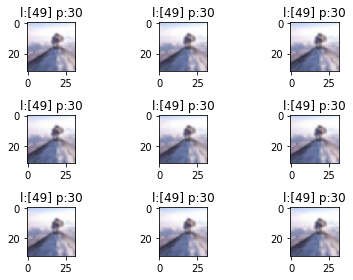

In [164]:
import matplotlib.pyplot as plt

for i in range(9):
  instance_index = false_pred[i] # indeks instancji do narysowania
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(X_train.shape[1], X_train.shape[2],X_train.shape[3] ), cmap='gray')
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))



## Instructions
Powtórz eksperyment z pierwszego notatnika (w którym klasyfikowaliśmy MNIST używając SVM i CNN) na zbiorze danych CIFAR-10: https://keras.io/datasets/

Najpierw przeprowadź klasyfikację za pomocą sieci, które stworzyliśmy na zajęciach - trzeba je dostosować, bo zdjęcia w CIFAR są w RGB, czyli mają 3 kanały.

Następnie wydziel zbiór walidacyjny i dodaj early stopping (https://keras.io/api/callbacks/early_stopping/)

Kolejnym krokiem jest próba poprawienia wyniku. Spróbuj wprowadzić modyfikacje (np. dodawanie, usuwanie lub modyfikacja warstw Conv2D, Dense, Pooling, dodanie Dropoutu, modyfikacja hiperparametrów, itd.) do sieci, które mogłyby poprawić jej skuteczność. Stwórz co najmniej 3 takie sieci i opisz wprowadzone w nich zmiany.

Dla chętnych: jakby ktoś chciałby się bardziej pobawić sieciami, można spróbować dodać jeszcze data augmentation i zrobić porównanie treningu z augmentation i bez.

Wrzuć plik .ipynb ze swoimi eksperymentami i opisami stworzonych sieci.

W razie pytań lub wąpliwości, proszę pisać: lukasz.wilczynski@pjwstk.edu.pl
My work

## Dodawanie Early stopping
Dodajemy early stopping dla tej samej sieci co poprzednio

In [165]:
from keras.callbacks import EarlyStopping
model_basic_es = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(100, activation='softmax')
])
model_basic_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(
    monitor="accuracy",
    # min_delta=0,
    patience=5,
    # verbose=0,
    # mode="auto",
    # baseline=None,
    # restore_best_weights=False,
)

In [166]:
history_basic = model_basic_es.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_validation,y_validation), callbacks = [es])

Epoch 1/100
157/157 [==============================] - 11s 70ms/step - loss: 4.1504 - accuracy: 0.0749 - val_loss: 436.0551 - val_accuracy: 0.0942
Epoch 2/100
157/157 [==============================] - 11s 69ms/step - loss: 3.5471 - accuracy: 0.1734 - val_loss: 538.4494 - val_accuracy: 0.1161
Epoch 3/100
157/157 [==============================] - 11s 69ms/step - loss: 3.2523 - accuracy: 0.2241 - val_loss: 640.8627 - val_accuracy: 0.1183
Epoch 4/100
157/157 [==============================] - 11s 70ms/step - loss: 3.0505 - accuracy: 0.2602 - val_loss: 682.8391 - val_accuracy: 0.1245
Epoch 5/100
157/157 [==============================] - 11s 69ms/step - loss: 2.9034 - accuracy: 0.2900 - val_loss: 638.2606 - val_accuracy: 0.1417
Epoch 6/100
157/157 [==============================] - 11s 69ms/step - loss: 2.7879 - accuracy: 0.3141 - val_loss: 745.8521 - val_accuracy: 0.1235
Epoch 7/100
157/157 [==============================] - 11s 69ms/step - loss: 2.6935 - accuracy: 0.3309 - val_loss: 666

## Sieć nr. 1 - głębsza


In [167]:
model_1 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), padding="same", activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(100, activation='softmax')
])
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 4, 4, 32)       

In [168]:
history_1 = model_1.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_validation,y_validation), callbacks = [es])

Epoch 1/200
157/157 [==============================] - 16s 99ms/step - loss: 4.3368 - accuracy: 0.0364 - val_loss: 288.2696 - val_accuracy: 0.0653
Epoch 2/200
157/157 [==============================] - 15s 96ms/step - loss: 3.9187 - accuracy: 0.0948 - val_loss: 334.1183 - val_accuracy: 0.1080
Epoch 3/200
157/157 [==============================] - 15s 96ms/step - loss: 3.6007 - accuracy: 0.1513 - val_loss: 514.6060 - val_accuracy: 0.0972
Epoch 4/200
157/157 [==============================] - 15s 95ms/step - loss: 3.3855 - accuracy: 0.1849 - val_loss: 556.9309 - val_accuracy: 0.0995
Epoch 5/200
157/157 [==============================] - 15s 96ms/step - loss: 3.2520 - accuracy: 0.2060 - val_loss: 543.7029 - val_accuracy: 0.1091
Epoch 6/200
157/157 [==============================] - 15s 96ms/step - loss: 3.1611 - accuracy: 0.2254 - val_loss: 484.9601 - val_accuracy: 0.1188
Epoch 7/200
157/157 [==============================] - 15s 96ms/step - loss: 3.0505 - accuracy: 0.2475 - val_loss: 515

KeyboardInterrupt: 

## Sieć nr. 2 - więcej feature map na jedną warstwę

In [ ]:
model_2 = Sequential([
  Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(128, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(512, activation='relu'),
  Dense(100, activation='softmax')
])
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_validation,y_validation), callbacks = [es])

Epoch 1/100
196/196 [==============================] - 53s 269ms/step - loss: 3.8160 - accuracy: 0.1281
Epoch 2/100
196/196 [==============================] - 52s 265ms/step - loss: 3.0620 - accuracy: 0.2585
Epoch 3/100
196/196 [==============================] - 51s 258ms/step - loss: 2.7181 - accuracy: 0.3260
Epoch 4/100
196/196 [==============================] - 50s 257ms/step - loss: 2.4835 - accuracy: 0.3710
Epoch 5/100
196/196 [==============================] - 50s 257ms/step - loss: 2.2827 - accuracy: 0.4153
Epoch 6/100
196/196 [==============================] - 50s 257ms/step - loss: 2.1018 - accuracy: 0.4552
Epoch 7/100
196/196 [==============================] - 51s 258ms/step - loss: 1.9393 - accuracy: 0.4955
Epoch 8/100
196/196 [==============================] - 51s 258ms/step - loss: 1.7757 - accuracy: 0.5287
Epoch 9/100
196/196 [==============================] - 51s 258ms/step - loss: 1.6138 - accuracy: 0.5665
Epoch 10/100
196/196 [==============================] - 50s 258m

## Sieć nr. 3 - z dropoutem

In [ ]:
from keras.layers import Dropout
model_3 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Dropout(.2),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(100, activation='softmax')
])
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_validation,y_validation), callbacks = [es])

Epoch 1/100
196/196 [==============================] - 14s 73ms/step - loss: 4.1609 - accuracy: 0.0703
Epoch 2/100
196/196 [==============================] - 14s 73ms/step - loss: 3.6034 - accuracy: 0.1595
Epoch 3/100
196/196 [==============================] - 14s 73ms/step - loss: 3.3471 - accuracy: 0.2033
Epoch 4/100
196/196 [==============================] - 14s 73ms/step - loss: 3.1674 - accuracy: 0.2348
Epoch 5/100
196/196 [==============================] - 14s 73ms/step - loss: 3.0241 - accuracy: 0.2624
Epoch 6/100
196/196 [==============================] - 14s 73ms/step - loss: 2.9182 - accuracy: 0.2829
Epoch 7/100
196/196 [==============================] - 14s 73ms/step - loss: 2.8161 - accuracy: 0.3040
Epoch 8/100
196/196 [==============================] - 14s 73ms/step - loss: 2.7280 - accuracy: 0.3203
Epoch 9/100
196/196 [==============================] - 14s 73ms/step - loss: 2.6532 - accuracy: 0.3358
Epoch 10/100
196/196 [==============================] - 14s 73ms/step - l

## Sieć nr. 4 - Data Augmentation

In [170]:
model_4 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(100, activation='softmax')
])
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_validation,y_validation), callbacks = [es])

Epoch 1/100
196/196 [==============================] - 15s 76ms/step - loss: 4.1605 - accuracy: 0.0678
Epoch 2/100
196/196 [==============================] - 15s 77ms/step - loss: 3.6319 - accuracy: 0.1566
Epoch 3/100
196/196 [==============================] - 15s 76ms/step - loss: 3.3863 - accuracy: 0.1991
Epoch 4/100
196/196 [==============================] - 15s 76ms/step - loss: 3.1890 - accuracy: 0.2342
Epoch 5/100
196/196 [==============================] - 15s 76ms/step - loss: 3.0243 - accuracy: 0.2665
Epoch 6/100
196/196 [==============================] - 15s 76ms/step - loss: 2.8965 - accuracy: 0.2900
Epoch 7/100
196/196 [==============================] - 15s 76ms/step - loss: 2.7954 - accuracy: 0.3102
Epoch 8/100
196/196 [==============================] - 15s 76ms/step - loss: 2.7171 - accuracy: 0.3263
Epoch 9/100
196/196 [==============================] - 15s 77ms/step - loss: 2.6368 - accuracy: 0.3420
Epoch 10/100
196/196 [==============================] - 15s 76ms/step - l

In [172]:
import tensorflow as tf

IMG_SIZE = 32
def augment(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
  image = tf.image.random_brightness(image, max_delta=0.5)
  return image, label
np
X_train = X_train.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

AttributeError: 'numpy.ndarray' object has no attribute 'map'